In [72]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import random
import shutil
import tensorflow_datasets as tfds

In [103]:
# variable
source_root_path = './dicom/NIH_1stPA_Norm_Fib'
dest_root_path = './dicom/NIH_Oversampled_5x'
findings_of_interest =['Fibrosis','No Finding']
sub_dirs=['training','validation']
sample_multipler = 5

##OVERSAMPLING

In [97]:

# let's set aside 20% of our Fibrosis images for validation, and the other 80% for training
fibrosis_images = os.listdir(source_root_path+'/Fibrosis') 
print(fibrosis_images[:3])
random.shuffle(fibrosis_images)
print(fibrosis_images[:3])
print(len(fibrosis_images))
num_for_validation = int(len(fibrosis_images)*.2)
validation_fibrosis_images = fibrosis_images[:num_for_validation]
training_firbosis_images = fibrosis_images[num_for_validation:]
# validation_fibrosis_images = random.sample(fibrosis_images,num_for_validation)
print(len(validation_fibrosis_images),len(training_firbosis_images))
# copy 20% to validation
for image in validation_fibrosis_images:
  source = f'{source_root_path}/Fibrosis/{image}'
  dest = f'{dest_root_path}/validation/Fibrosis/{image}'
  # print( source, dest)
  # break
  shutil.copy(source,dest)
# copy 80% to training
for image in training_firbosis_images:
  source = f'{source_root_path}/Fibrosis/{image}'
  dest = f'{dest_root_path}/training/Fibrosis/{image}'
  # print( source, dest)
  # break
  shutil.copy(source,dest)



['00000945_000.png', '00000733_003.png', '00000324_007.png']
['00006717_006.png', '00012265_000.png', '00000218_005.png']
637
127 510


In [110]:
#Now let's move normal (No Finding) images, we aim to have 5x the base sample of fibrosis training images
fibrosis_training_count = len(os.listdir(dest_root_path+'/training/Fibrosis'))
print(fibrosis_training_count)
count_of_normals_needed = fibrosis_training_count * sample_multipler +num_for_validation
print(count_of_normals_needed)
normal_images = os.listdir(source_root_path+'/No Finding') 
print(len(normal_images))
normal_images = random.sample(normal_images,count_of_normals_needed)
len(validation_normal_images)

validation_normal_images = normal_images[:num_for_validation]
training_normal_images = normal_images[num_for_validation:]
# validation_normal_images = random.sample(normal_images,num_for_validation)
print(len(validation_normal_images),len(training_normal_images))
# copy a small amount for validation
for image in validation_normal_images:
  source = f'{source_root_path}/No Finding/{image}'
  dest = f'{dest_root_path}/validation/No Finding/{image}'
  # print( source, dest)
  # break
  shutil.copy(source,dest)
# # copy the rest to training
for image in training_normal_images:
  source = f'{source_root_path}/No Finding/{image}'
  dest = f'{dest_root_path}/training/No Finding/{image}'
  # print( source, dest)
  # break
  shutil.copy(source,dest)


510
2677
6370
127 2550


At this point we have 127 CXRs of no findings and 127 CXR with fibrosis in our validation folder.
But we have 5x the number of normals compared to Fibrosis CXRs in our training folder.

### A) OVERSAMPLING

In [111]:
# Let's us create a simple oversampled folder, increase our firbosis images by 5x (don't run this if you want to do augmentation)

root_path = 'dicom/NIH_Oversampled_5x/training/Fibrosis'
image_paths = os.listdir(root_path)
for filename in image_paths:
  splitF = filename.split('.') 
  for i in range(1,5):
    new_filename = f'{splitF[0]}-{i}.{splitF[1]}'
    source = f'{root_path}/{filename}'
    dest = f'{root_path}/{new_filename}'
    shutil.copy(source,dest)



### B) Augmentation

In [118]:

# import numpy as np
# import tensorflow as tf

# data_augmentation = tf.keras.Sequential([
#               tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
#               tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
#              ])
img_path= os.listdir(root_path)[0]
# Python program to explain cv2.rotate() method
  
# importing cv2
import cv2
  
# path
# path = r'C:\Users\user\Desktop\geeks14.png'
  
# Reading an image in default mode
src = cv2.imread(img_path)
  
# Window name in which image is displayed
window_name = 'Image'
  
# Using cv2.rotate() method
# Using cv2.ROTATE_180 rotate by 
# 180 degrees clockwise
image = cv2.rotate(src, cv2.ROTATE_180)
  
# Displaying the image
cv2.imshow(window_name, image)
cv2.waitKey(0)

[ WARN:0@0.949] global /Users/runner/miniforge3/conda-bld/libopencv_1657598026024/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('00000945_000.png'): can't open/read file: check file path/integrity


error: OpenCV(4.6.0) /Users/runner/miniforge3/conda-bld/libopencv_1657598026024/work/modules/highgui/src/window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


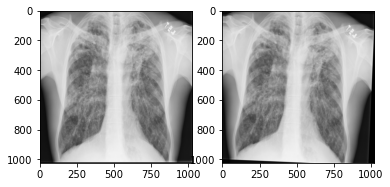

In [163]:
# Data augmentation, NOTE YOU MIGHT HAVE TO RENAME THE FOLDER
# (image_ds) = tfds.load('./dicom/NIH_1stPA_Norm_Fib/Training/Fibrosis Augmented' )

from textwrap import fill
import tensorflow as tf
import matplotlib.pyplot as plt
def show(im,im2): 
    plt.subplot(1,2,1) 
    plt.imshow(im) 
    plt.subplot(1,2,2) 
    plt.imshow(im2) 
    plt.show() 
    
img = tf.keras.utils.load_img( './dicom/NIH_Oversampled_5x/training/Fibrosis/00000022_001-1.png')
# img = tf.image.decode_jpeg(img, channels=0)/255
# img = tf.image.resize(img, (320,320))
# plt.imshow(img) 
data_augmentation = tf.keras.Sequential([
  # tf.keras.layers.ZeroPadding1D(padding=200),
  tf.keras.layers.RandomTranslation(0.025,0.025,fill_mode='nearest'),
  tf.keras.layers.RandomZoom(0.025,fill_mode='nearest'),
  tf.keras.layers.RandomRotation(7.5/360,fill_mode='nearest')
 
])
image_array  = tf.keras.preprocessing.image.img_to_array(img)/255.0
augmented_image = data_augmentation(image_array)
show(img,augmented_image)
# plt.imshow(augmented_image)



In [112]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)